<a href="https://colab.research.google.com/github/DevilNReality/Term-Deposit-Prediction/blob/main/Code%20File/Predicting_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries And Dataset

In [ ]:
# Basic libaries
import pandas as pd
import numpy as np
# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# PreProcessing Libraries
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
# Logistic Regression Model And Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
# Decision Tree And Random Forest Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
# SVM Model
from sklearn.svm import SVC

In [ ]:
dataset = pd.read_csv('/content/bank-additional-full.csv' , sep = ';')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

In [ ]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Uni Variate Analysis

In [ ]:
dataset.skew()

<ipython-input-56-8035be43cde7>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


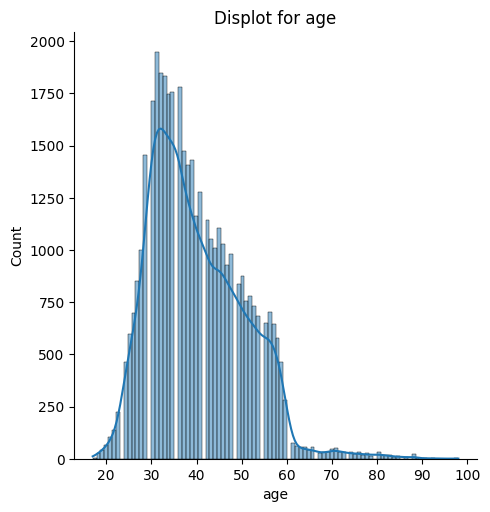

<Figure size 1200x1000 with 0 Axes>

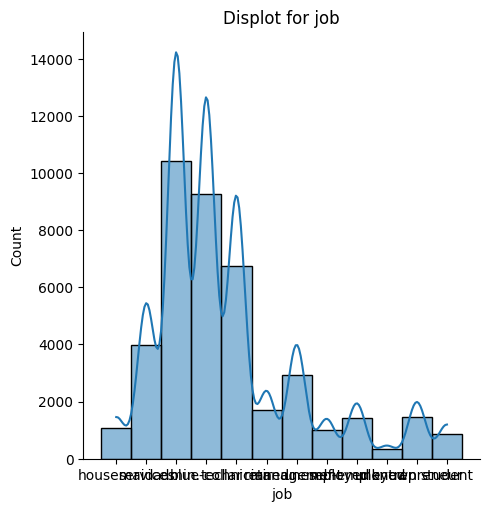

<Figure size 1200x1000 with 0 Axes>

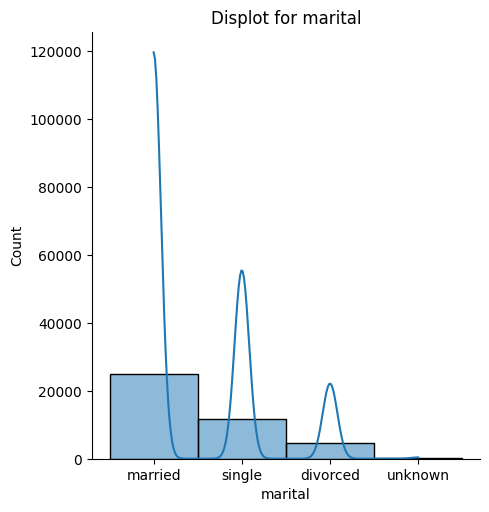

<Figure size 1200x1000 with 0 Axes>

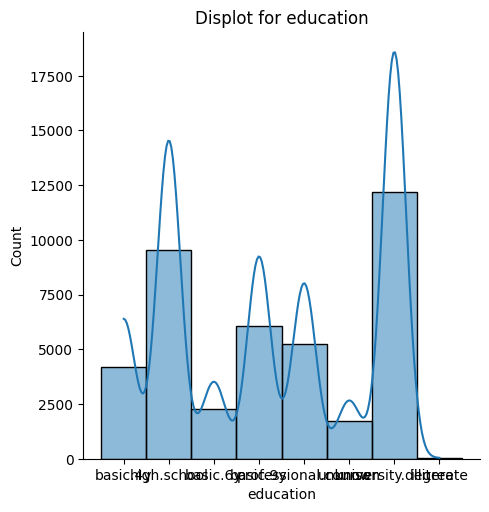

<Figure size 1200x1000 with 0 Axes>

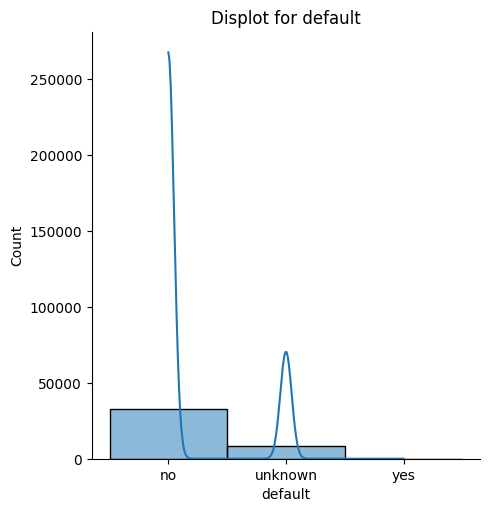

<Figure size 1200x1000 with 0 Axes>

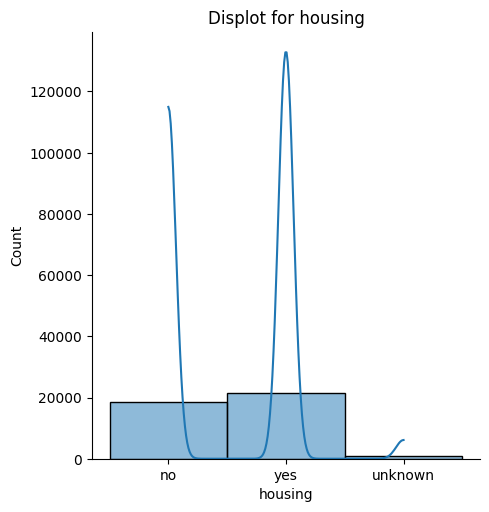

<Figure size 1200x1000 with 0 Axes>

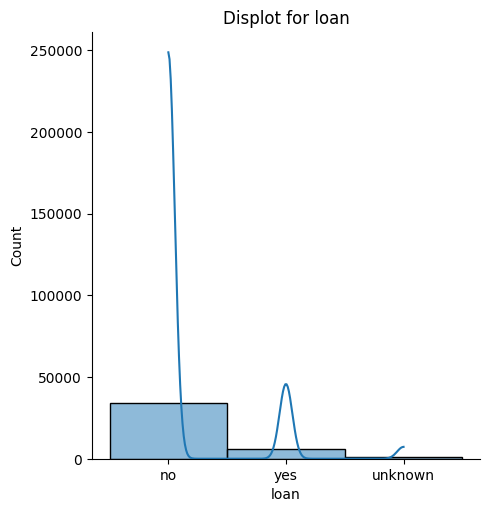

<Figure size 1200x1000 with 0 Axes>

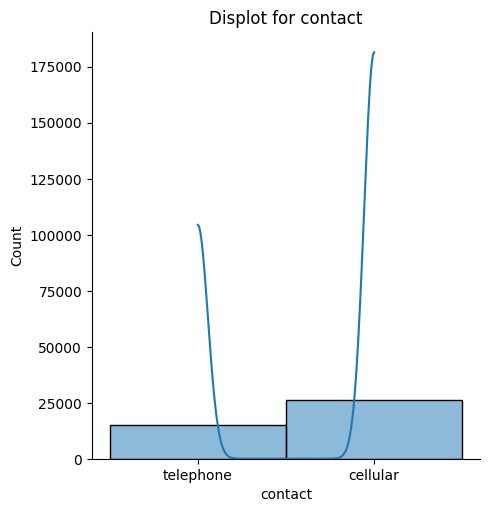

<Figure size 1200x1000 with 0 Axes>

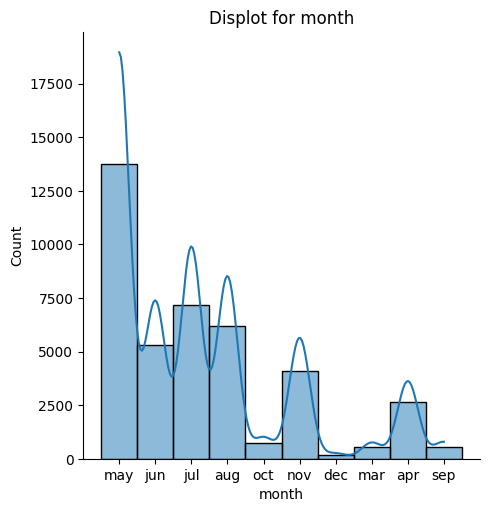

<Figure size 1200x1000 with 0 Axes>

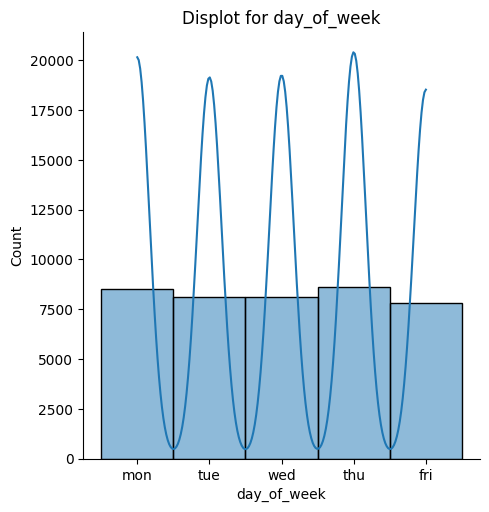

<Figure size 1200x1000 with 0 Axes>

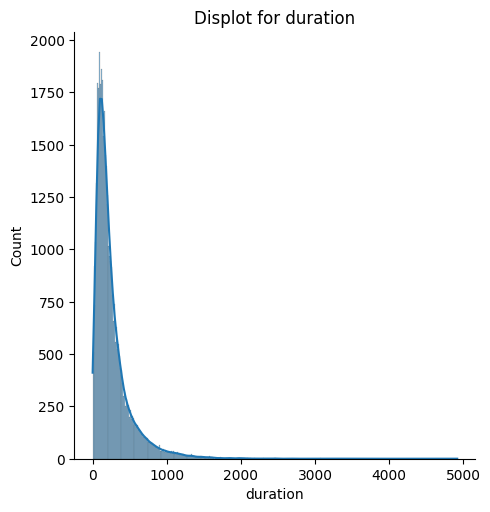

<Figure size 1200x1000 with 0 Axes>

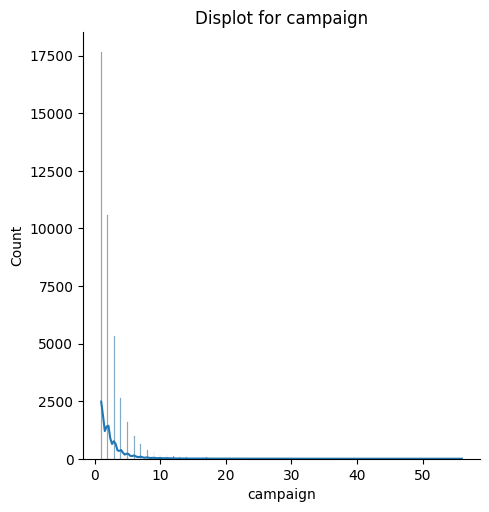

<Figure size 1200x1000 with 0 Axes>

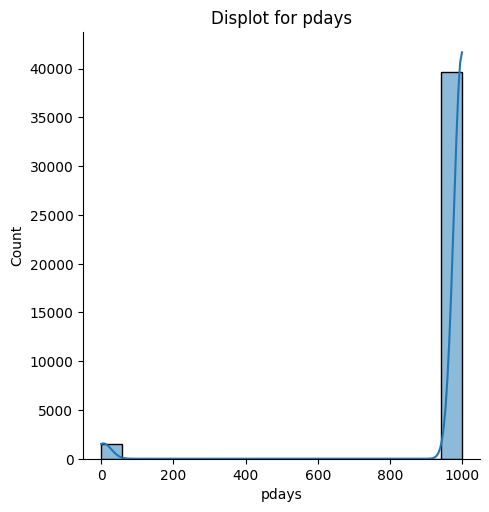

<Figure size 1200x1000 with 0 Axes>

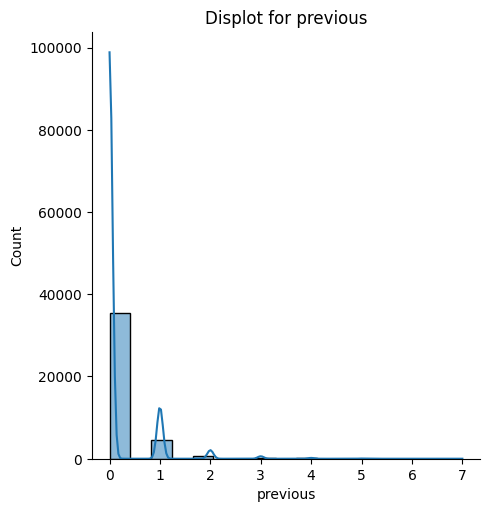

<Figure size 1200x1000 with 0 Axes>

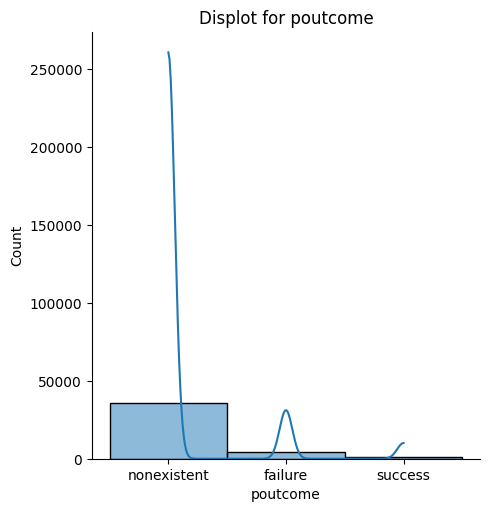

<Figure size 1200x1000 with 0 Axes>

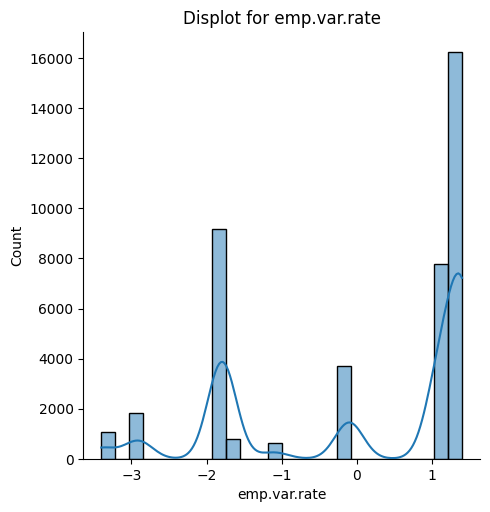

<Figure size 1200x1000 with 0 Axes>

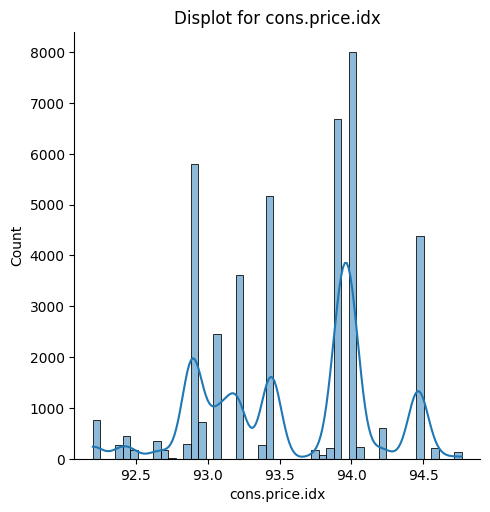

<Figure size 1200x1000 with 0 Axes>

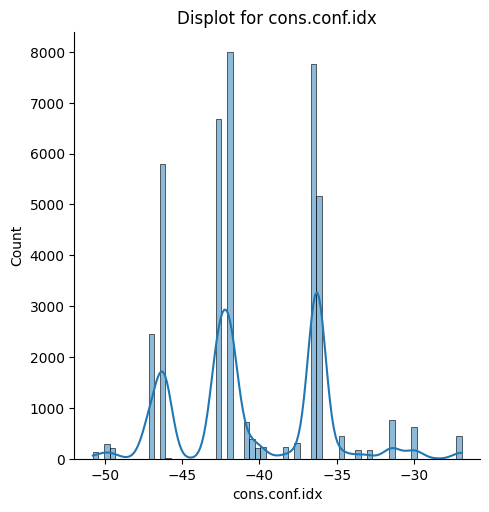

<Figure size 1200x1000 with 0 Axes>

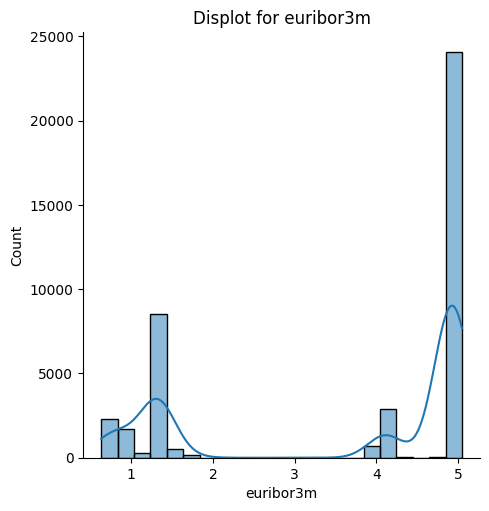

<Figure size 1200x1000 with 0 Axes>

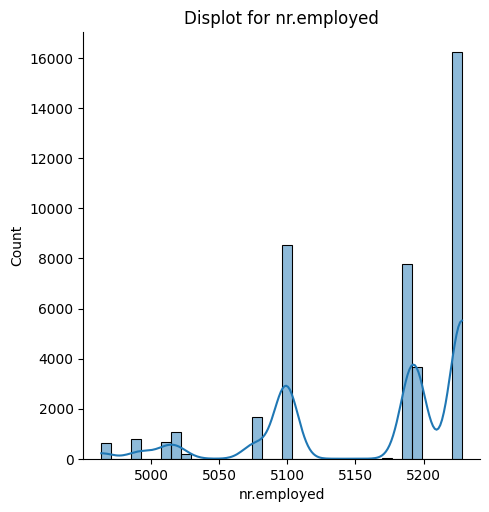

<Figure size 1200x1000 with 0 Axes>

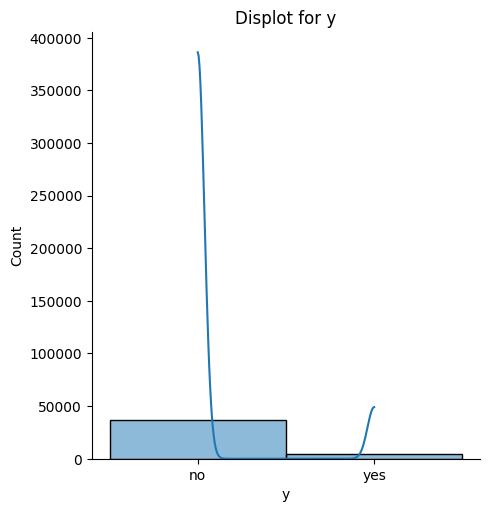

<Figure size 1200x1000 with 0 Axes>

In [ ]:
for i in dataset.columns:
  sns.displot(dataset[i] , kde = True)
  plt.title(f'Displot for {i}')
  plt.figure(figsize = (12,10))

## Bi Variate Analysis

<ipython-input-58-e37d5d1e35ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr() , annot = True , cmap = 'BuPu')


<Axes: >

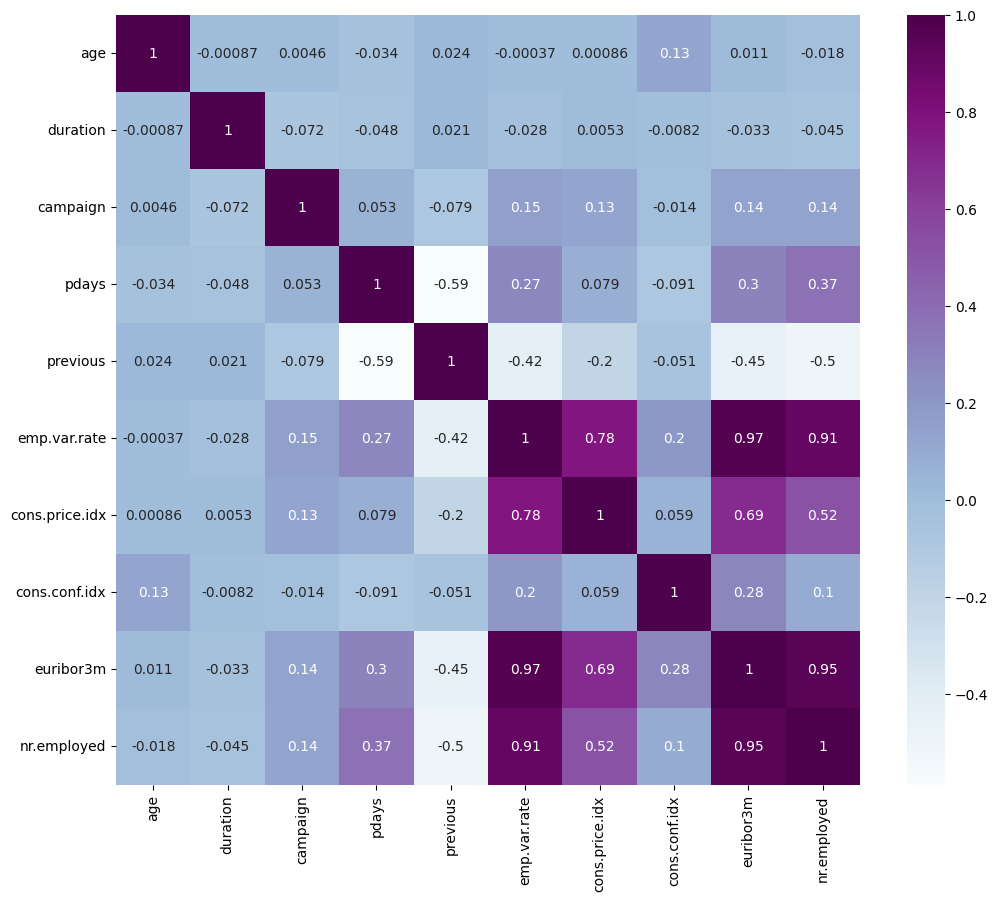

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(dataset.corr() , annot = True , cmap = 'BuPu')

# Data Preparation

## One Hot Encoding

In [ ]:
dataset_enc = pd.get_dummies(dataset.iloc[: , : -1])

In [ ]:
dataset_enc.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
dataset_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

# Data Splitting

In [ ]:
x = dataset_enc
y = dataset['y']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 63)
(8238, 63)
(32950,)
(8238,)


# Model Evaluation Function

In [ ]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

# Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 33000)
lr.fit(x_train , y_train)

LogisticRegression(max_iter=33000)

In [ ]:
y_hat_train_lr = lr.predict(x_train)
y_hat_test_lr = lr.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_lr)

The Accuracy of the Model is: 0.91
[[28485   760]
 [ 2174  1531]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     29245
         yes       0.67      0.41      0.51      3705

    accuracy                           0.91     32950
   macro avg       0.80      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950



In [ ]:
model_eval(y_test , y_hat_test_lr)

The Accuracy of the Model is: 0.91
[[7106  197]
 [ 538  397]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)

DecisionTreeClassifier()

In [ ]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_dtree)

The Accuracy of the Model is: 1.0
[[29245     0]
 [    0  3705]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29245
         yes       1.00      1.00      1.00      3705

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [ ]:
model_eval(y_test , y_hat_test_dtree)

The Accuracy of the Model is: 0.89
[[6833  470]
 [ 447  488]]
              precision    recall  f1-score   support

          no       0.94      0.94      0.94      7303
         yes       0.51      0.52      0.52       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_rf)

The Accuracy of the Model is: 1.0
[[29245     0]
 [    0  3705]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29245
         yes       1.00      1.00      1.00      3705

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [ ]:
model_eval(y_test , y_hat_test_rf)

The Accuracy of the Model is: 0.91
[[7086  217]
 [ 523  412]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.44      0.53       935

    accuracy                           0.91      8238
   macro avg       0.79      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238



# Ada Boost

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train , y_train)

AdaBoostClassifier()

In [ ]:
y_hat_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_ada)

The Accuracy of the Model is: 0.91
[[28519   726]
 [ 2182  1523]]
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     29245
         yes       0.68      0.41      0.51      3705

    accuracy                           0.91     32950
   macro avg       0.80      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950



In [ ]:
model_eval(y_test , y_hat_test_ada)

The Accuracy of the Model is: 0.91
[[7117  186]
 [ 558  377]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train , y_train)

GradientBoostingClassifier()

In [ ]:
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_gb)

The Accuracy of the Model is: 0.92
[[28333   912]
 [ 1658  2047]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.96     29245
         yes       0.69      0.55      0.61      3705

    accuracy                           0.92     32950
   macro avg       0.82      0.76      0.79     32950
weighted avg       0.92      0.92      0.92     32950



In [ ]:
model_eval(y_test , y_hat_test_gb)

The Accuracy of the Model is: 0.92
[[7072  231]
 [ 437  498]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7303
         yes       0.68      0.53      0.60       935

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238



# XG Boosting

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.fit_transform(y_test)

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train , y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

In [ ]:
model_eval(y_train_enc , y_hat_train_xgb)

The Accuracy of the Model is: 0.96
[[28853   392]
 [  847  2858]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29245
           1       0.88      0.77      0.82      3705

    accuracy                           0.96     32950
   macro avg       0.93      0.88      0.90     32950
weighted avg       0.96      0.96      0.96     32950



In [ ]:
model_eval(y_test_enc , y_hat_test_xgb)

The Accuracy of the Model is: 0.92
[[7016  287]
 [ 410  525]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.56      0.60       935

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



# KNN Model

In [ ]:
acc_list = []
for i in range(1,100):
  knn2 = KNeighborsClassifier(n_neighbors = i)
  knn2.fit(x_train , y_train)
  y_hat_test_knn2 = knn2.predict(x_test)
  acc_list.append(round(accuracy_score(y_test , y_hat_test_knn2) , 2))
print(acc_list)

[0.89, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91]


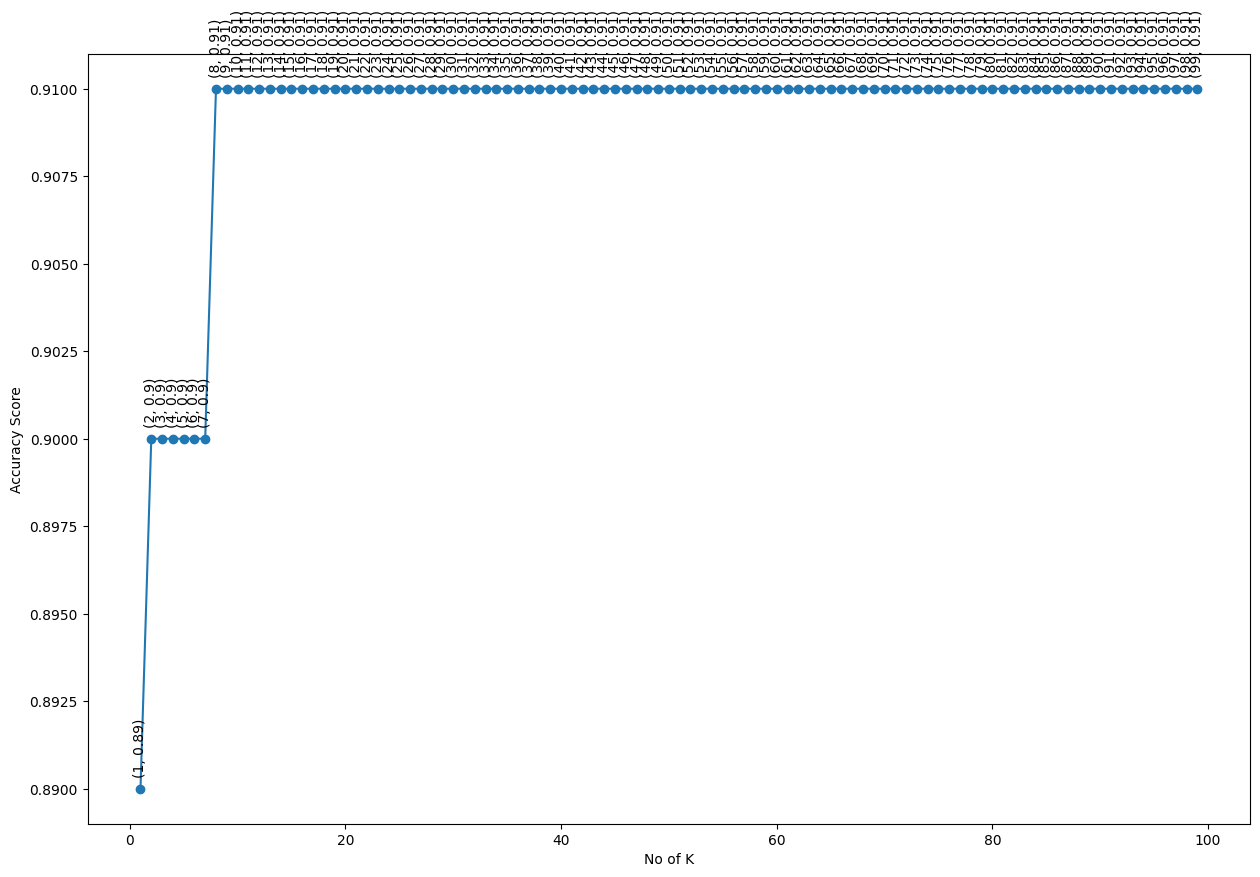

In [ ]:
x = np.array([i for i in range(1,100)])
y = acc_list
plt.figure(figsize=(15, 10))
plt.plot(x, y, marker='o', linestyle='-')
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center' , rotation = 90)
plt.xlabel("No of K")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train , y_train )

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_knn)

The Accuracy of the Model is: 0.92
[[28614   631]
 [ 1897  1808]]
              precision    recall  f1-score   support

          no       0.94      0.98      0.96     29245
         yes       0.74      0.49      0.59      3705

    accuracy                           0.92     32950
   macro avg       0.84      0.73      0.77     32950
weighted avg       0.92      0.92      0.92     32950



In [ ]:
model_eval(y_test , y_hat_test_knn)

The Accuracy of the Model is: 0.91
[[7084  219]
 [ 561  374]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.63      0.40      0.49       935

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.89      0.91      0.90      8238



# SVM

In [ ]:
svm = SVC(C = 6 , kernel = 'poly' , degree = 6)
svm.fit(x_train , y_train)

SVC(C=6, degree=6, kernel='poly')

In [ ]:
y_hat_train_svm = svm.predict(x_train)
y_hat_test_svm = svm.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_svm)

The Accuracy of the Model is: 0.9
[[28733   512]
 [ 2793   912]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     29245
         yes       0.64      0.25      0.36      3705

    accuracy                           0.90     32950
   macro avg       0.78      0.61      0.65     32950
weighted avg       0.88      0.90      0.88     32950



In [ ]:
model_eval(y_test , y_hat_test_svm)

The Accuracy of the Model is: 0.9
[[7158  145]
 [ 707  228]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.61      0.24      0.35       935

    accuracy                           0.90      8238
   macro avg       0.76      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



# Model Performance

In [ ]:
accuracy_table=[['Logistic Regression',round(accuracy_score(y_test , y_hat_test_lr),2)],
  ['Decision Tree', round(accuracy_score(y_test , y_hat_test_dtree),2)],
  ['Random Forest' , round(accuracy_score(y_test , y_hat_test_rf),2)],
  ['Ada Boosting' , round(accuracy_score(y_test , y_hat_test_ada),2)],
  ['Gradient Boosting' , round(accuracy_score(y_test , y_hat_test_gb),2)],
  ['XGBoosting' , round(accuracy_score(y_test_enc, y_hat_test_xgb),2)],
  ['KNN' , round(accuracy_score(y_test , y_hat_test_knn),2)],
  ['SVM', round(accuracy_score(y_test , y_hat_test_svm),2)]             ]
df1 = pd.DataFrame(accuracy_table, columns = ['Model','Test_Accuracy'])
print(df1)

                 Model  Test_Accuracy
0  Logistic Regression           0.91
1        Decision Tree           0.89
2        Random Forest           0.91
3         Ada Boosting           0.91
4    Gradient Boosting           0.92
5           XGBoosting           0.92
6                  KNN           0.91
7                  SVM           0.90
